In [97]:
# install.packages('data.table')
library(igraph)
library(data.table)

In [99]:
df = fread(file="movie_edge_list_2.txt")
colnames(df) = c("v1", "v2", "weight")
nrow(df)
head(df)

[1] 66469062

v1,v2,weight
289507,398135,0.136364
203305,398135,0.038462
338230,398135,0.041667
41794,398135,0.024390
398135,409561,0.027027
291338,398135,0.038462


In [3]:
g <- graph.data.frame(df, directed = FALSE)
vcount(g)

[1] 203427

In [27]:
E(g)$weight[1:5]
# given_movie_id_list = c(9123, 157575, 9064)

[1] 0.136364 0.038462 0.041667 0.024390 0.027027

In [76]:
# n_m1=V(g)$name[neighbors(g,9123)]
# # print(n_m1)
# m = 9123
# print(n_m1)

In [100]:
movie_id_df <- fread(file="movie_id_map.csv") #, header=TRUE, sep=",")

In [101]:
# movie_id_df$id[which(movie_id_df$movie=='Proste pragnienia (2011)')]
head(movie_id_df)

V1,movie,id
0,Blown Out (1997),0
1,Bergsnden (1919),1
2,Erste Ehe (2002),2
3,Wrong Number (2009/I),3
4,McKaraoke (1993),4
5,Country (2007),5


In [109]:
movie_id_df$id[which(movie_id_df$movie=='Batman v Superman: Dawn of Justice (2016)')]

[1] 9618

In [110]:
movie_id_df$id[which(movie_id_df$movie=='Mission: Impossible - Rogue Nation (2015)')]

[1] 225427

In [111]:
movie_id_df$id[which(movie_id_df$movie=='Minions (2015)')]

[1] 442284

In [102]:
movie_ratings_df <- fread(file='data/movie_rating.txt')

In [103]:
nrow(movie_ratings_df)
head(movie_ratings_df)
# intersect(movie_ratings_df$movie, movie_id_df$movie)

[1] 348547

Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1

V1,V2,V3
Bamma Maata Bangaru Baata (1990),NA,7.5
The 61st Annual Golden Globe Awards (2004),NA,5.1
Con la msica a otra parte (1975),NA,3.4
Funeralii fericite (2013),NA,8.1
"Zoom, Zoom, Superman! (1973)",NA,5.6
Fever Lake (1996),NA,2.9


## Q 9

### Movie 1: Batman v Superman: Dawn of Justice 

In [133]:
## movie 1
n1 = neighbors(g, '9618')$name
movie_1 = c()
ratings_1 = c()

for(i in n1){
    movie_name <- movie_id_df$movie[which(movie_id_df$id==i)]
    rating <- movie_ratings_df$V3[which(movie_ratings_df$V1 == movie_name)]
    
    if(length(rating)>0){
    }
            movie_1 <- c(movie_1, i)
        ratings_1 <- c(ratings_1, rating)

}

In [166]:
length(n1)

[1] 1051

In [135]:
mean(ratings_1)

[1] 6.331917

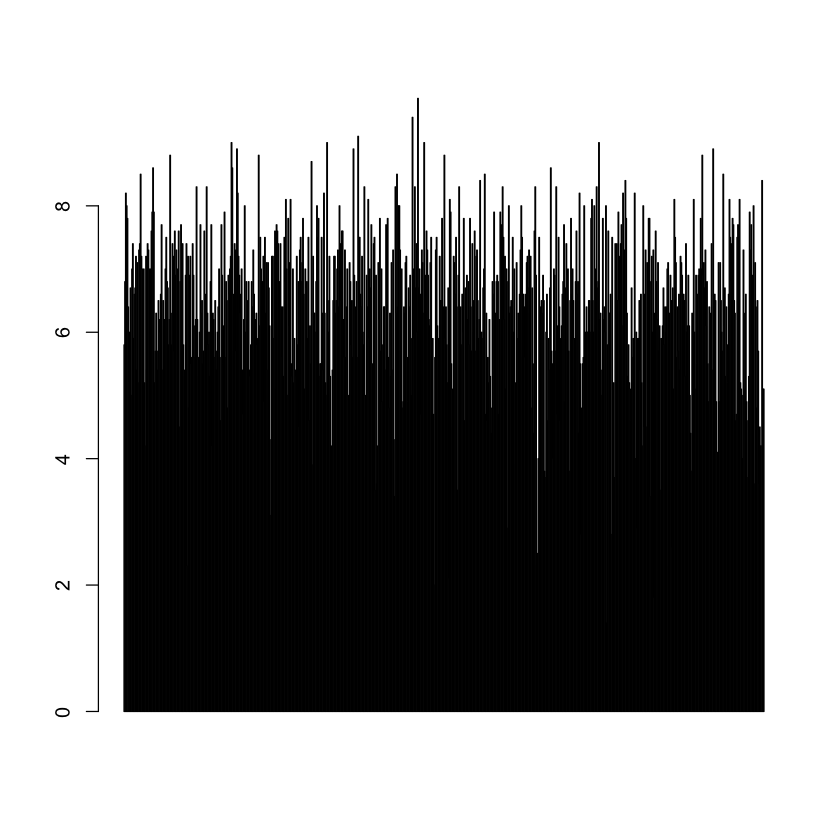

In [136]:
barplot(ratings_1)

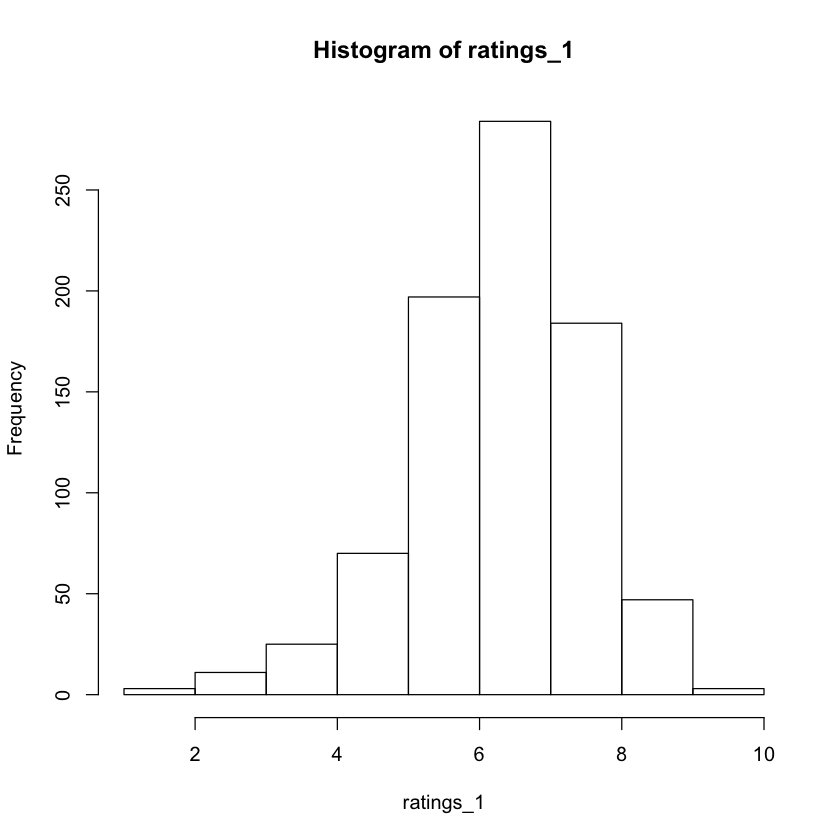

In [137]:
hist(ratings_1)

### Movie 2: Mission: Impossible - Rogue Nation

In [138]:
## movie 2
n2 = neighbors(g, '225427')$name
movie_2 = c()
ratings_2 = c()

for(i in n2){
    movie_name <- movie_id_df$movie[which(movie_id_df$id==i)]
    rating <- movie_ratings_df$V3[which(movie_ratings_df$V1 == movie_name)]
    
    movie_2 <- c(movie_2, i)
    ratings_2 <- c(ratings_2, rating)
}

In [139]:
length(n2)

[1] 803

In [140]:
mean(ratings_2)

[1] 6.265422

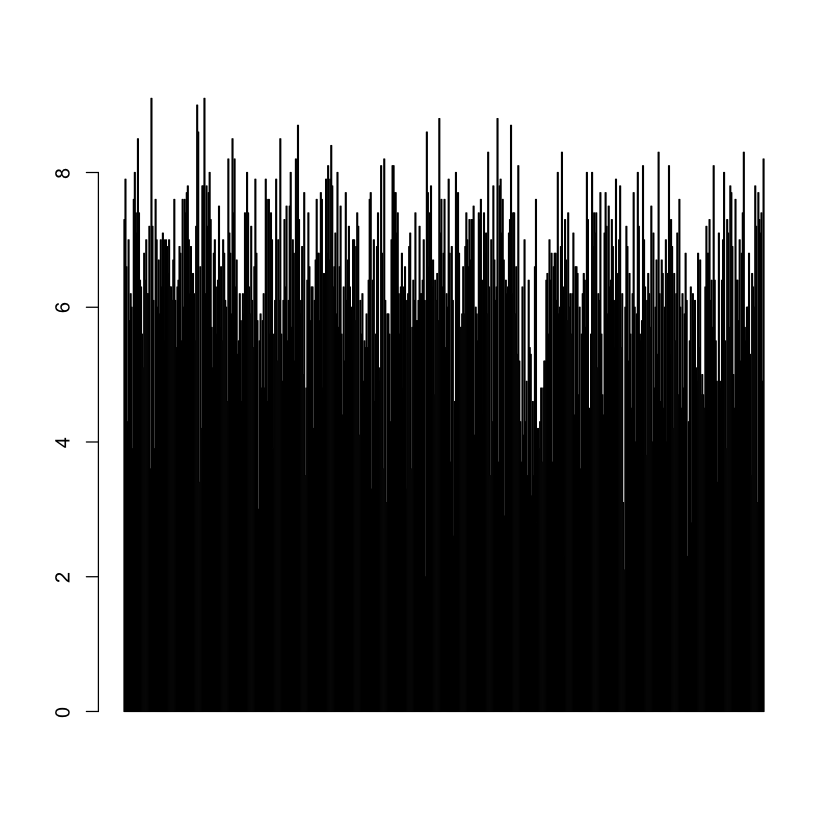

In [141]:
barplot(ratings_2)

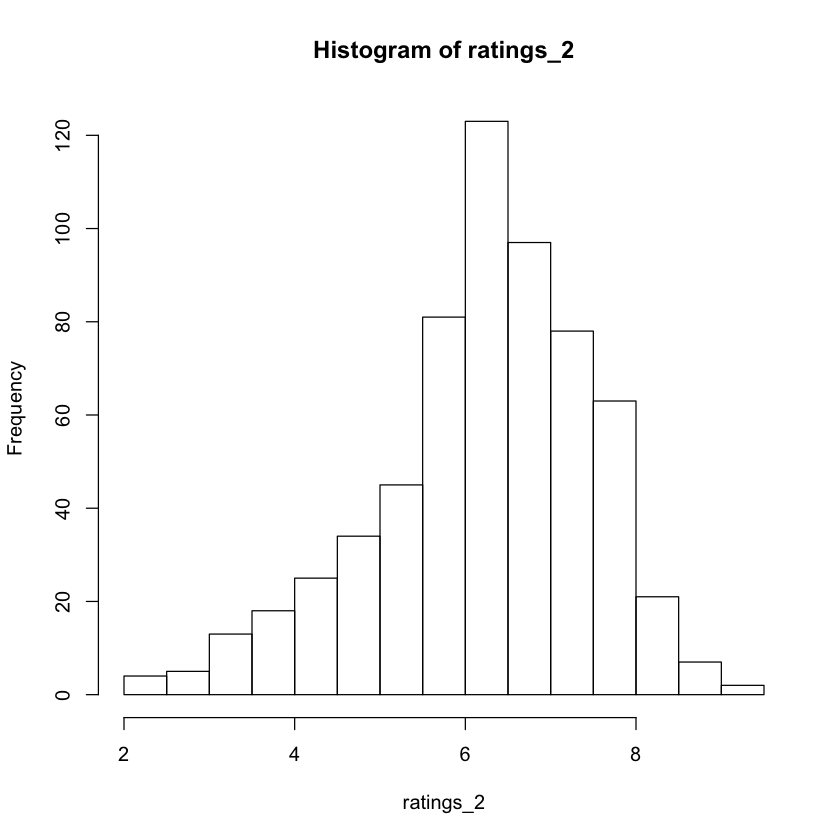

In [142]:
hist(ratings_2)

### Movie 3: Minions

In [144]:
## movie 3
n3 = neighbors(g, '442284')$name
movie_3 = c()
ratings_3 = c()

for(i in n3){
    movie_name <- movie_id_df$movie[which(movie_id_df$id==i)]
    rating <- movie_ratings_df$V3[which(movie_ratings_df$V1 == movie_name)]

    movie_3 <- c(movie_3, i)
    ratings_3 <- c(ratings_3, rating)

}

In [146]:
length(n3)

[1] 772

In [147]:
mean(ratings_3)

[1] 6.814787

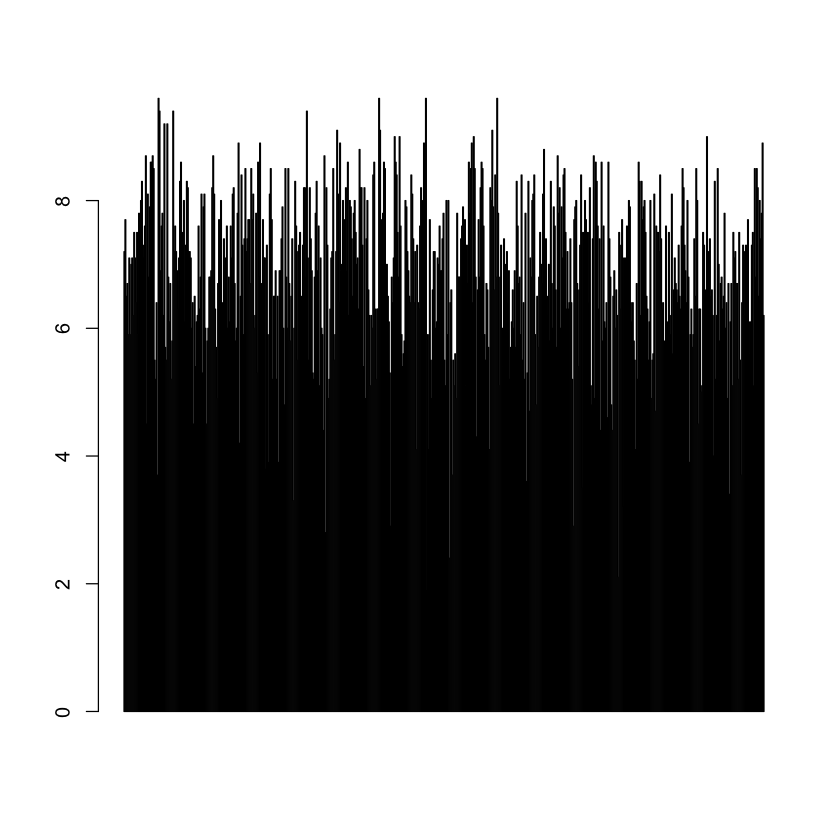

In [148]:
barplot(ratings_3)

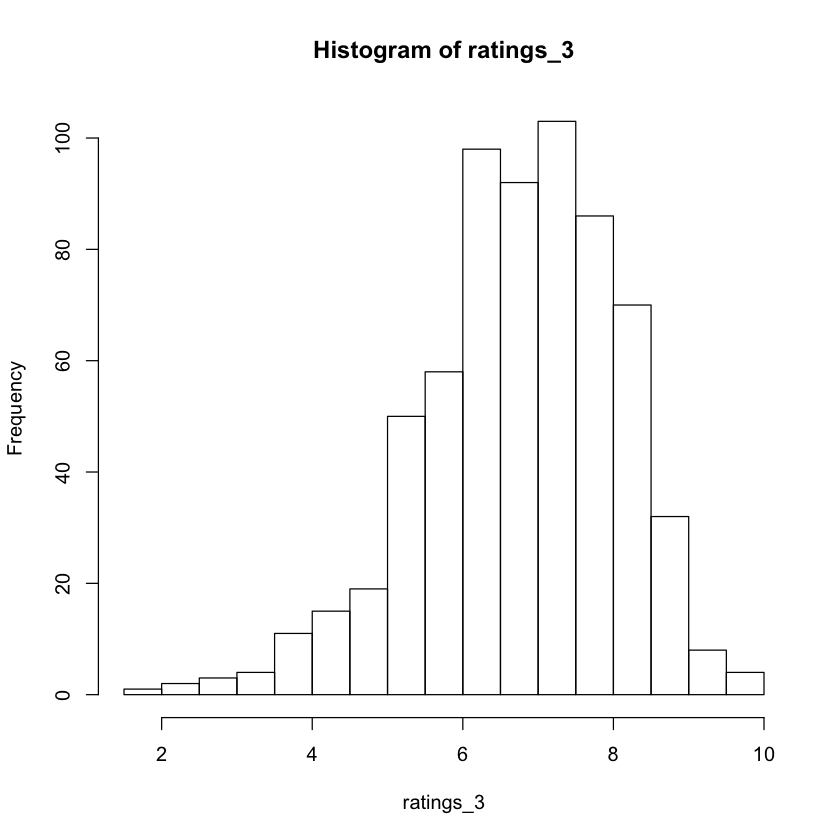

In [149]:
hist(ratings_3)

In [150]:
community_graph <- readRDS('new_new_coms.rds')

In [152]:
print(sizes(community_graph))

Community sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
43429  9116 35121 27696 12820  7822  6168  4372  2102  3399  8516  7221  5941 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 1769  1644  9670  5938   620   797  3507   681  4153    14   425    17    11 
   27    28    29    30 
   18   404    22    14 


## Q10

### Movie 1

In [186]:
## Movie 1: batman v superman
mem1 = community_graph$membership[which(V(g)$name == '9618')]
comm_neighbors_1 = intersect(n1, V(g)$name[which(community_graph$membership == mem1)])

In [187]:
print(length(comm_neighbors_1))

[1] 994


In [189]:
movie_ratings_list <- function(n){
    movie = c()
    ratings = c()
    
    for(i in n){
        movie_name <- movie_id_df$movie[which(movie_id_df$id==i)]
        rating <- movie_ratings_df$V3[which(movie_ratings_df$V1 == movie_name)]
        
            movie <- c(movie, i)
            ratings <- c(ratings, rating)

    }
    
    return(list(movie, ratings))  
}

In [190]:
movie_ratings_1_10 = movie_ratings_list(comm_neighbors_1)

In [191]:
length(movie_ratings_1_10[[2]])

[1] 774

In [194]:
mean(movie_ratings_1_10[[2]])

[1] 6.32261

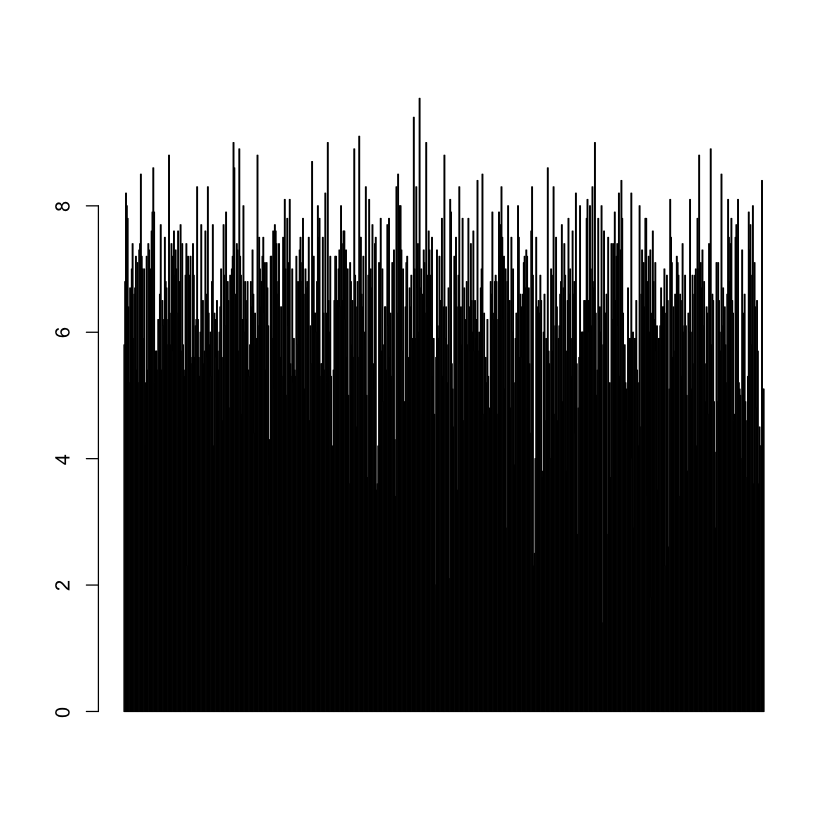

In [195]:
barplot(movie_ratings_1_10[[2]])

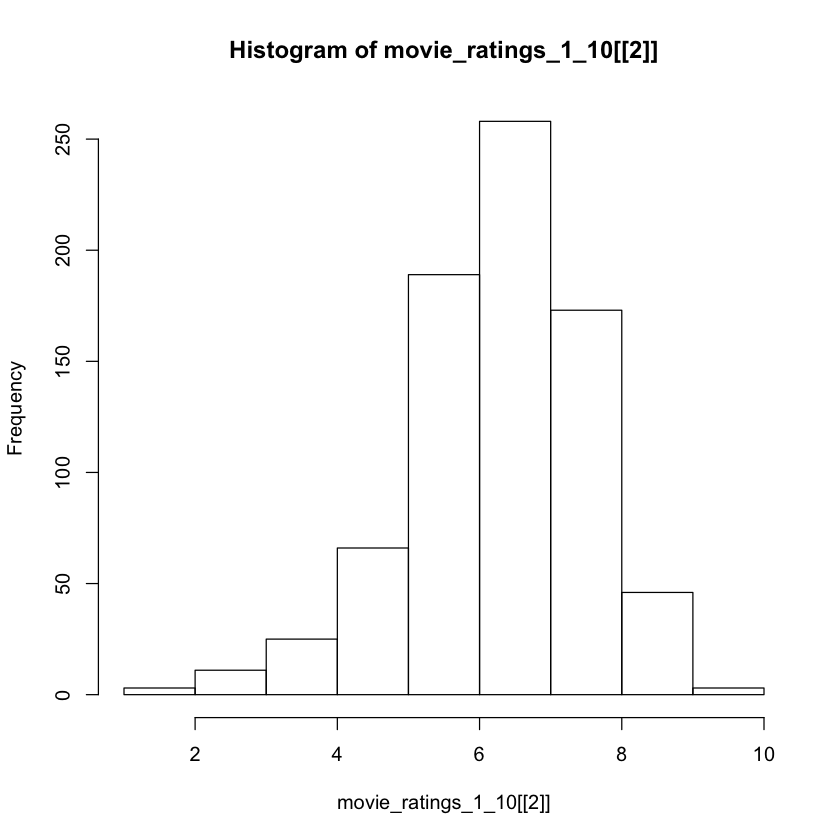

In [196]:
hist(movie_ratings_1_10[[2]])

### Movie 2

In [199]:
mem2 = community_graph$membership[which(V(g)$name == '225427')]
comm_neighbors_2 = intersect(n2, V(g)$name[which(community_graph$membership == mem2)])

movie_ratings_2_10 = movie_ratings_list(comm_neighbors_2)

In [307]:
length(comm_neighbors_2)

[1] 669

In [200]:
length(movie_ratings_2_10[[2]])

[1] 515

In [202]:
mean(movie_ratings_2_10[[2]])

[1] 6.294757

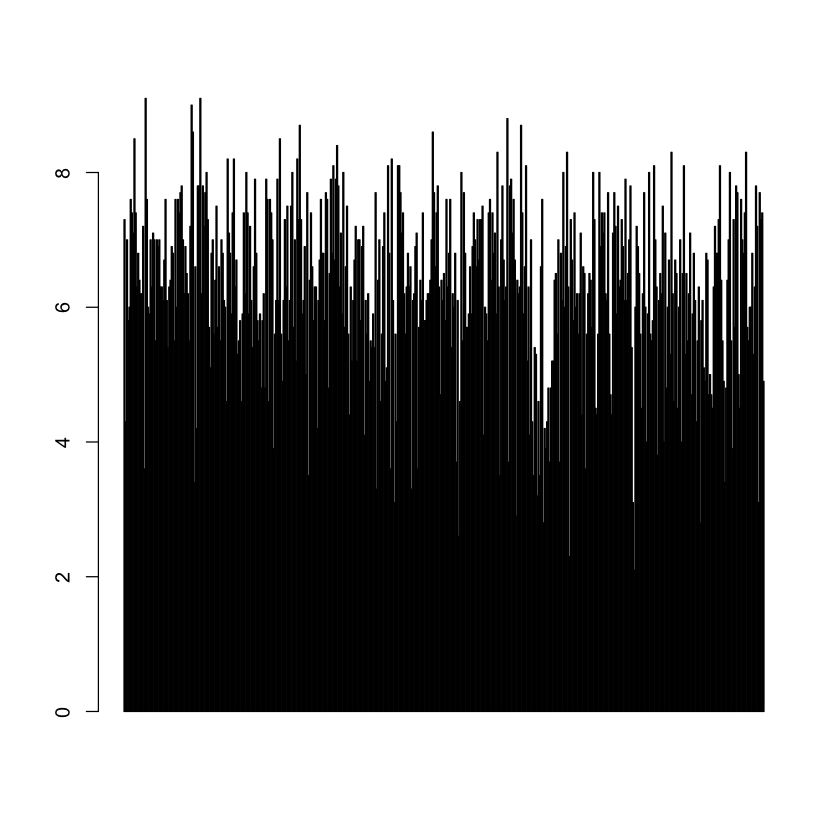

In [203]:
barplot(movie_ratings_2_10[[2]])

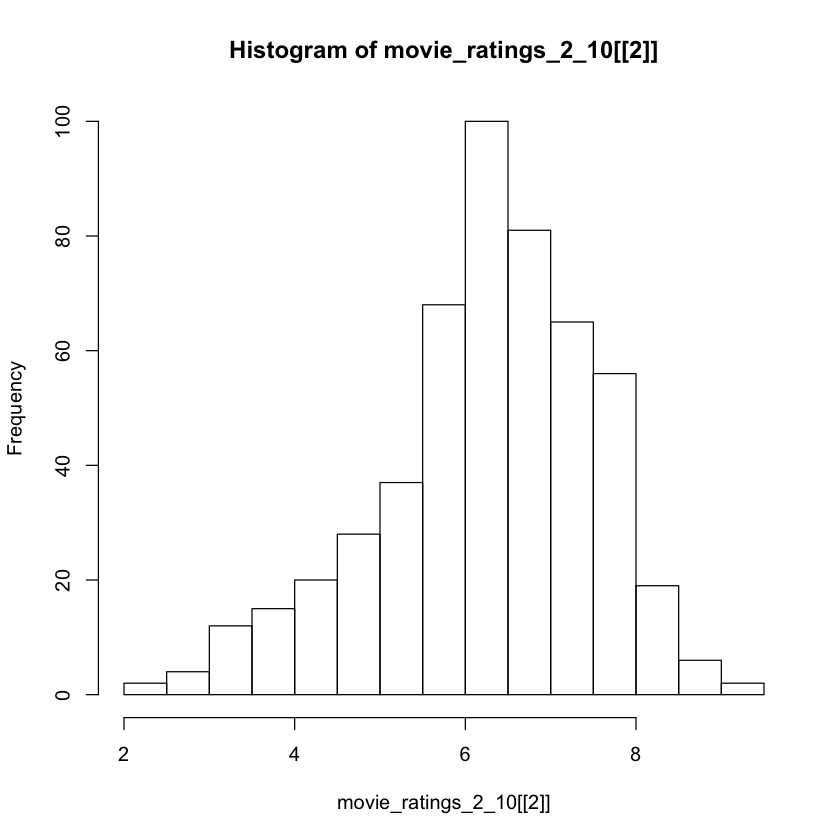

In [204]:
hist(movie_ratings_2_10[[2]])

### Movie 3

In [206]:
mem3 = community_graph$membership[which(V(g)$name == '442284')]
comm_neighbors_3 = intersect(n3, V(g)$name[which(community_graph$membership == mem3)])

movie_ratings_3_10 = movie_ratings_list(comm_neighbors_3)

In [308]:
length(comm_neighbors_3)

[1] 682

In [207]:
length(movie_ratings_3_10[[2]])

[1] 585

In [208]:
mean(movie_ratings_3_10[[2]])

[1] 6.817607

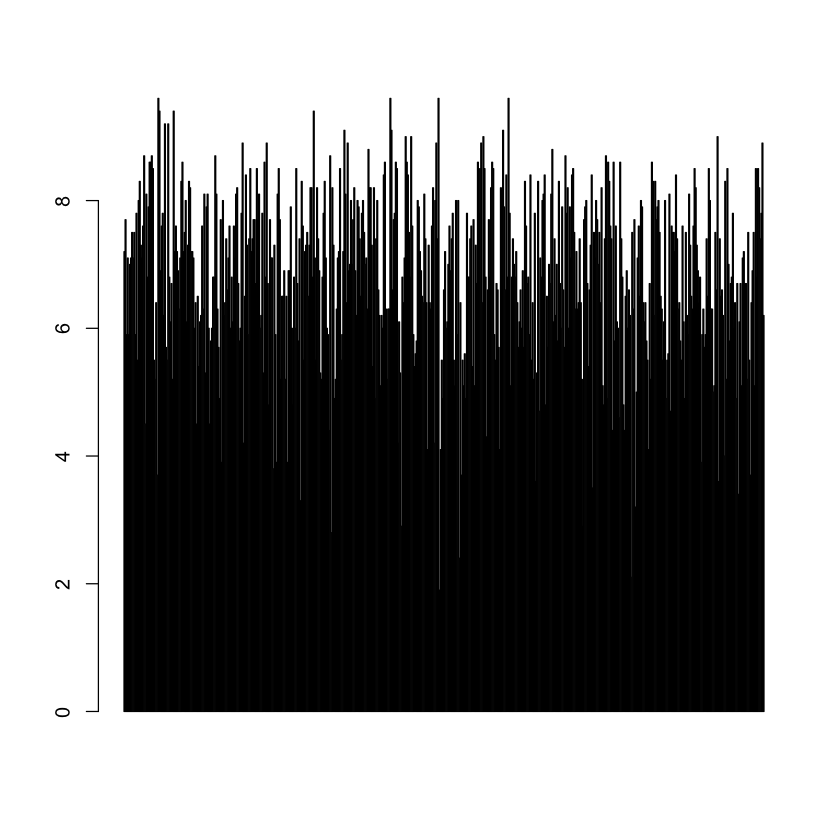

In [209]:
barplot(movie_ratings_3_10[[2]])

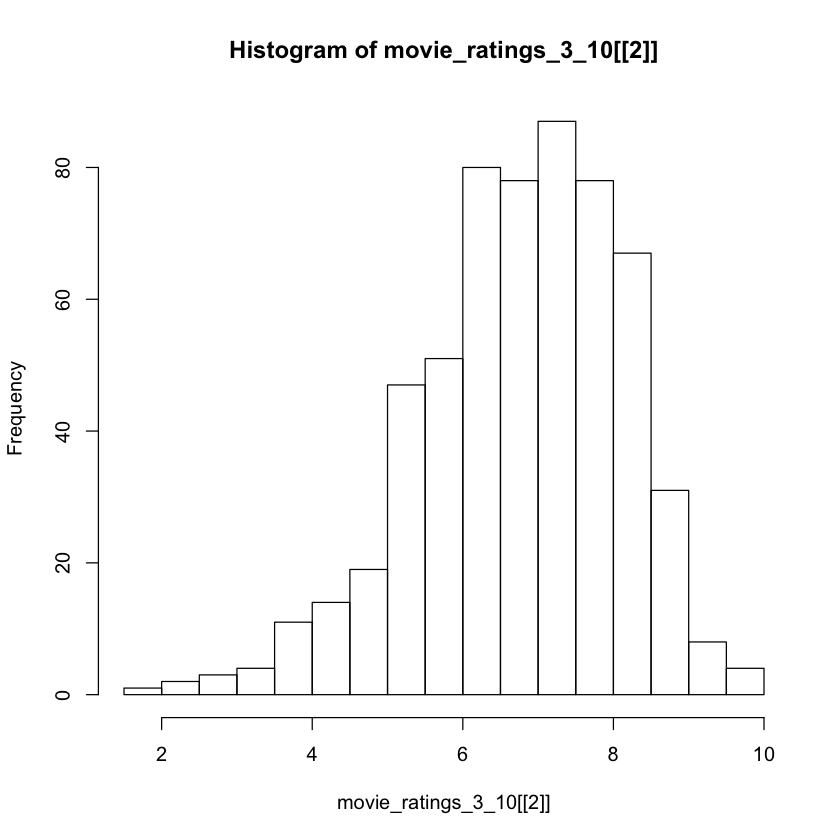

In [210]:
hist(movie_ratings_3_10[[2]])

## Q11

In [238]:
# get_nearest_neighbor_weighted = function(v) {
#     ns = neighbors(g, v)$name
#     ws = sapply(ns, function(x){ edge_attr(g, "weight", get.edge.ids(g, c(v, x))) })
#     return( ns[ order(ws, decreasing = TRUE) ] )
# }

In [311]:
print(community_graph$membership[which(V(g)$name == '9618')])
print(community_graph$membership[which(V(g)$name == '225427')])
print(community_graph$membership[which(V(g)$name == '442284')])

[1] 1
[1] 1
[1] 1


### Movie 1

In [272]:
all_n1 = df[which(df$v1 == '9618' | df$v2 == '9618')]

In [273]:
nrow(all_n1)
all_n1 = all_n1[order(all_n1$weight, decreasing = TRUE), ]
t51 = all_n1$v2[1:5]

[1] 1051

In [294]:
for(i in t51){
    print(i)
    print(movie_id_df$movie[which(movie_id_df$id == i)])
    print(community_graph$membership[which(V(g)$name == i)])
}

[1] 130317
[1] "Eloise (2015)"
[1] 1
[1] 144306
[1] "The Justice League Part One (2017)"
[1] 1
[1] 100805
[1] "Into the Storm (2014)"
[1] 1
[1] 152671
[1] "Love and Honor (2013)"
[1] 1
[1] 402587
[1] "Man of Steel (2013)"
[1] 1


### Movie 2

In [276]:
all_n2 = df[which(df$v1 == '225427' | df$v2 == '225427')]

In [299]:
nrow(all_n2)
all_n2 = all_n2[order(all_n2$weight, decreasing = TRUE), ]
t52 = c(all_n2$v1[1], all_n2$v2[2:5]) 

[1] 803

In [300]:
t52

[1] 222527 315470 414143 299098 369193

In [301]:
for(i in t52){
    print(i)
    print(movie_id_df$movie[which(movie_id_df$id == i)])
    print(community_graph$membership[which(V(g)$name == i)])
}

[1] 222527
[1] "Fan (2015)"
[1] 11
[1] 315470
[1] "Phantom (2015)"
[1] 11
[1] 414143
[1] "Breaking the Bank (2014)"
[1] 1
[1] 299098
[1] "Suffragette (2015)"
[1] 1
[1] 369193
[1] "Now You See Me: The Second Act (2016)"
[1] 1


### Movie 3

In [284]:
all_n3 = df[which(df$v1 == '442284' | df$v2 == '442284')]

In [304]:
nrow(all_n3)
all_n3 = all_n3[order(all_n3$weight, decreasing = TRUE), ]
t53 = all_n3$v1[1:5]

[1] 772

In [305]:
t53

[1] 219883 194429 248285  87985 417539

In [306]:
for(i in t53){
    print(i)
    print(movie_id_df$movie[which(movie_id_df$id == i)])
    print(community_graph$membership[which(V(g)$name == i)])
}

[1] 219883
[1] "The Lorax (2012)"
[1] 1
[1] 194429
[1] "Inside Out (2015)"
[1] 1
[1] 248285
[1] "Up (2009)"
[1] 1
[1] 87985
[1] "Surfs Up (2007)"
[1] 1
[1] 417539
[1] "Despicable Me 2 (2013)"
[1] 1
